# Logistic Regression
`Logistic regression` is a supervised learning algorithm used to predict the probability of a categorical dependent variable.this is use for classification problem.
Logistic regression can be used for :
1. Binary classification
2. Multiclass classification
3. Multilabel classification

# Assumtions of Logistic Regression:
1. The dependent variable should be categorical.
2. The dependent variable should be binary.
3. The independent variables should be continuous.
4. The data should be linearly separable.
5. The data should be normally distributed.
6. The data should be independent.
7. The data should be homoscedastic.
8. The data should be free of outliers.
9. The data should be free of multicollinearity.
10. The data should be free of missing values.
    

In [61]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
# library for spliting data
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# import Data
df = sns.load_dataset('titanic')
df.head(####fkmmkw#sqmksmk mc###333,,slqlfmlwqmflwmflwmflwmdddd###3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [63]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [64]:
# remove the deck column
df.drop('deck',axis=1,inplace=True)

In [ ]:
# preprocess data

# impute missing vals in age , embarked,embark_town
df['age'].fillna(df['age'].median(),inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)
# encoding catigorical data using loop with lable encoding where category and objects datatypes are given
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])
      
  


In [70]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [66]:
# x and y columns
x = df.drop(['survived'],axis=1)
y = df['survived']

In [67]:
# train test split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [68]:
# model call
model = LogisticRegression()

In [69]:
# train
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# predict
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1])

In [72]:
# Evaluate the model
print('accuracy',accuracy_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))
print('recall',recall_score(y_test,y_pred))
print('f1',f1_score(y_test,y_pred))
print('confusion matrix',confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred)) 


accuracy 1.0
precision 1.0
recall 1.0
f1 1.0
confusion matrix [[102   0]
 [  0  77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00        77

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



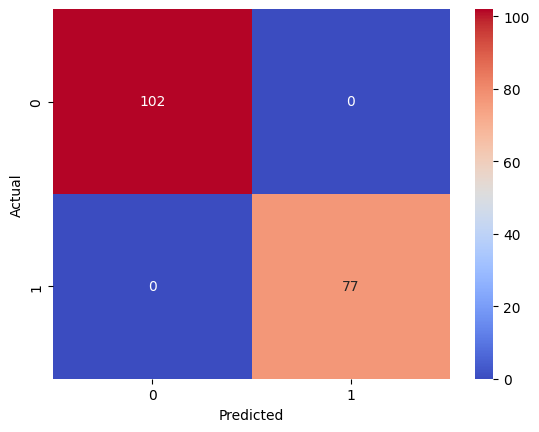

In [76]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [78]:
# save the model
import pickle
pickle.dump(model,open('model_logistic.pkl','wb'))